In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import  warnings
%matplotlib inline
from pylab import rcParams
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)

warnings.filterwarnings("ignore")



In [2]:
#app_dt = pd.read_csv(r'C:\Users\Credit_EDA_Casestudy\a.csv')
#app_dt = pd.read_csv('application_data.csv')
app_dt = pd.read_csv(r'D:/share/application_data.csv')

# Class Imbalance in the dataset

Text(0.5, 0.98, 'Percentage imbalance in Defaulters and Non-defaulters')

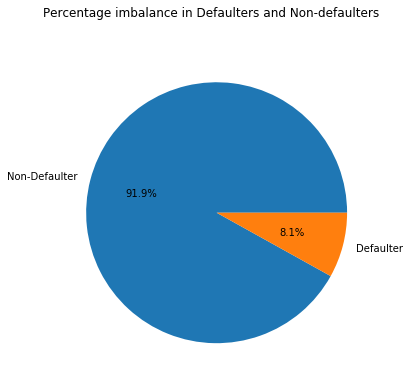

In [3]:
plt.figure(figsize=(6,6))
size=list(dict(app_dt['TARGET'].value_counts()).values())
label=['Non-Defaulter','Defaulter']
plt.pie(size,labels=label,autopct='%1.1f%%')
plt.suptitle("Percentage imbalance in Defaulters and Non-defaulters")

# Column Drop if below of the two conditions are true
 1. If missing value is more than 47% 
 2. If column description does not make any sense

In [4]:
# For dropping columns with huge missing values
my_list = []
#For imputation suggestion
my_list2= []
#For car age, car_owned will decide the null value percentage
own_car_age=pd.DataFrame(app_dt.query('FLAG_OWN_CAR=="Y"'))
for i in app_dt.columns:
    null_percent=round(100*(app_dt[i].isnull().sum()/len(app_dt)), 2)
    
    if(i=='OWN_CAR_AGE'):
        
        if round(100*(own_car_age['OWN_CAR_AGE'].isnull().sum())/len(own_car_age), 2) >=47:
            my_list.append(i)
        
    elif null_percent >= 47:
        my_list.append(i)
    elif null_percent < 20  and null_percent >10:
        my_list2.append(i)
#List of columns  with null percent >=  47

app_dt = app_dt.drop(my_list, axis = 1)
#List columns with null percent <20and >10 for suggesting imputations


In [5]:
app_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.00

# Retain only required columns based upon Column Description. 
1. Columns which doesnot make any sense to me.
2. Comparing Mean, Median and percentile of the columns

In [6]:
#pd.set_option('display.max_columns', None)
app_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.00

In [7]:


wanted=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
        'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE',
        'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
        'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
        'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
        'REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
        'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']+ my_list2
app_dt=app_dt[wanted]
app_dt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

In [8]:
app_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,School,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,1,Religion,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


# Change dataype of columns
1) Set datatype to category for categorical columns

2) Convert int64 to float64 for ease of analysis

In [9]:
category_col=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
              'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
              'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE',
              'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION',
              'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']
#convert required columns to category
for i in category_col:
    app_dt[i]=app_dt[i].astype('category')
    
#convert all int columns to float
for i in list(app_dt.columns):
    print(i,app_dt[i].dtype)
    if(app_dt[i].dtype==np.int64):
        app_dt[i]=app_dt[i].astype('float64')
app_dt.info()

SK_ID_CURR category
TARGET category
NAME_CONTRACT_TYPE category
CODE_GENDER category
FLAG_OWN_CAR category
FLAG_OWN_REALTY category
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_INCOME_TYPE category
NAME_EDUCATION_TYPE category
NAME_FAMILY_STATUS category
NAME_HOUSING_TYPE category
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL category
FLAG_EMP_PHONE category
FLAG_WORK_PHONE category
FLAG_CONT_MOBILE category
FLAG_PHONE category
FLAG_EMAIL category
OCCUPATION_TYPE category
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT category
REGION_RATING_CLIENT_W_CITY category
REG_REGION_NOT_LIVE_REGION category
LIVE_REGION_NOT_WORK_REGION category
REG_CITY_NOT_LIVE_CITY category
LIVE_CITY_NOT_WORK_CITY category
ORGANIZATION_TYPE category
OBS_30_CNT_SOCIAL_CIRCLE float64
DEF_30_CNT_SOCIAL_CIRCLE float64
OBS_60_CNT_SOCIAL_CIRCLE floa

# Check the NA Values can be replaced by Mean or Median

In [10]:
# Inspection of unique values/range in column
for i in app_dt.columns:
    if(len(app_dt[i].unique())<15):
        print('{}:{}'.format(i,app_dt[i].unique()))
    elif(app_dt[i].dtype==np.float64()):
        print('{}:{} {}'.format(i,app_dt[i].min(),app_dt[i].max()))

TARGET:[1, 0]
Categories (2, int64): [1, 0]
NAME_CONTRACT_TYPE:[Cash loans, Revolving loans]
Categories (2, object): [Cash loans, Revolving loans]
CODE_GENDER:[M, F, XNA]
Categories (3, object): [M, F, XNA]
FLAG_OWN_CAR:[N, Y]
Categories (2, object): [N, Y]
FLAG_OWN_REALTY:[Y, N]
Categories (2, object): [Y, N]
CNT_CHILDREN:0.0 19.0
AMT_INCOME_TOTAL:25650.0 117000000.0
AMT_CREDIT:45000.0 4050000.0
AMT_ANNUITY:1615.5 258025.5
AMT_GOODS_PRICE:40500.0 4050000.0
NAME_INCOME_TYPE:[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]
Categories (8, object): [Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]
NAME_EDUCATION_TYPE:[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
Categories (5, object): [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
NAME_FAMILY_STATUS:[Single / 

In [11]:
# Replace XAP and XNA with np.nan
app_dt.replace(['XNA','XAP'],np.nan,inplace=True)


In [12]:
#Check if XNA/XAP present
for i in app_dt.columns:
    if(len(app_dt[i].unique())<15):
        print('{}:{}'.format(i,app_dt[i].unique()))
    elif(app_dt[i].dtype==np.float64()):
        print('{}:{}{}'.format(i,app_dt[i].min(),app_dt[i].max()))

TARGET:[1, 0]
Categories (2, int64): [1, 0]
NAME_CONTRACT_TYPE:[Cash loans, Revolving loans]
Categories (2, object): [Cash loans, Revolving loans]
CODE_GENDER:[M, F, NaN]
Categories (2, object): [M, F]
FLAG_OWN_CAR:[N, Y]
Categories (2, object): [N, Y]
FLAG_OWN_REALTY:[Y, N]
Categories (2, object): [Y, N]
CNT_CHILDREN:0.019.0
AMT_INCOME_TOTAL:25650.0117000000.0
AMT_CREDIT:45000.04050000.0
AMT_ANNUITY:1615.5258025.5
AMT_GOODS_PRICE:40500.04050000.0
NAME_INCOME_TYPE:[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]
Categories (8, object): [Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]
NAME_EDUCATION_TYPE:[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
Categories (5, object): [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
NAME_FAMILY_STATUS:[Single / not marrie

# Imputation suggestion for column with 10-20% data missing

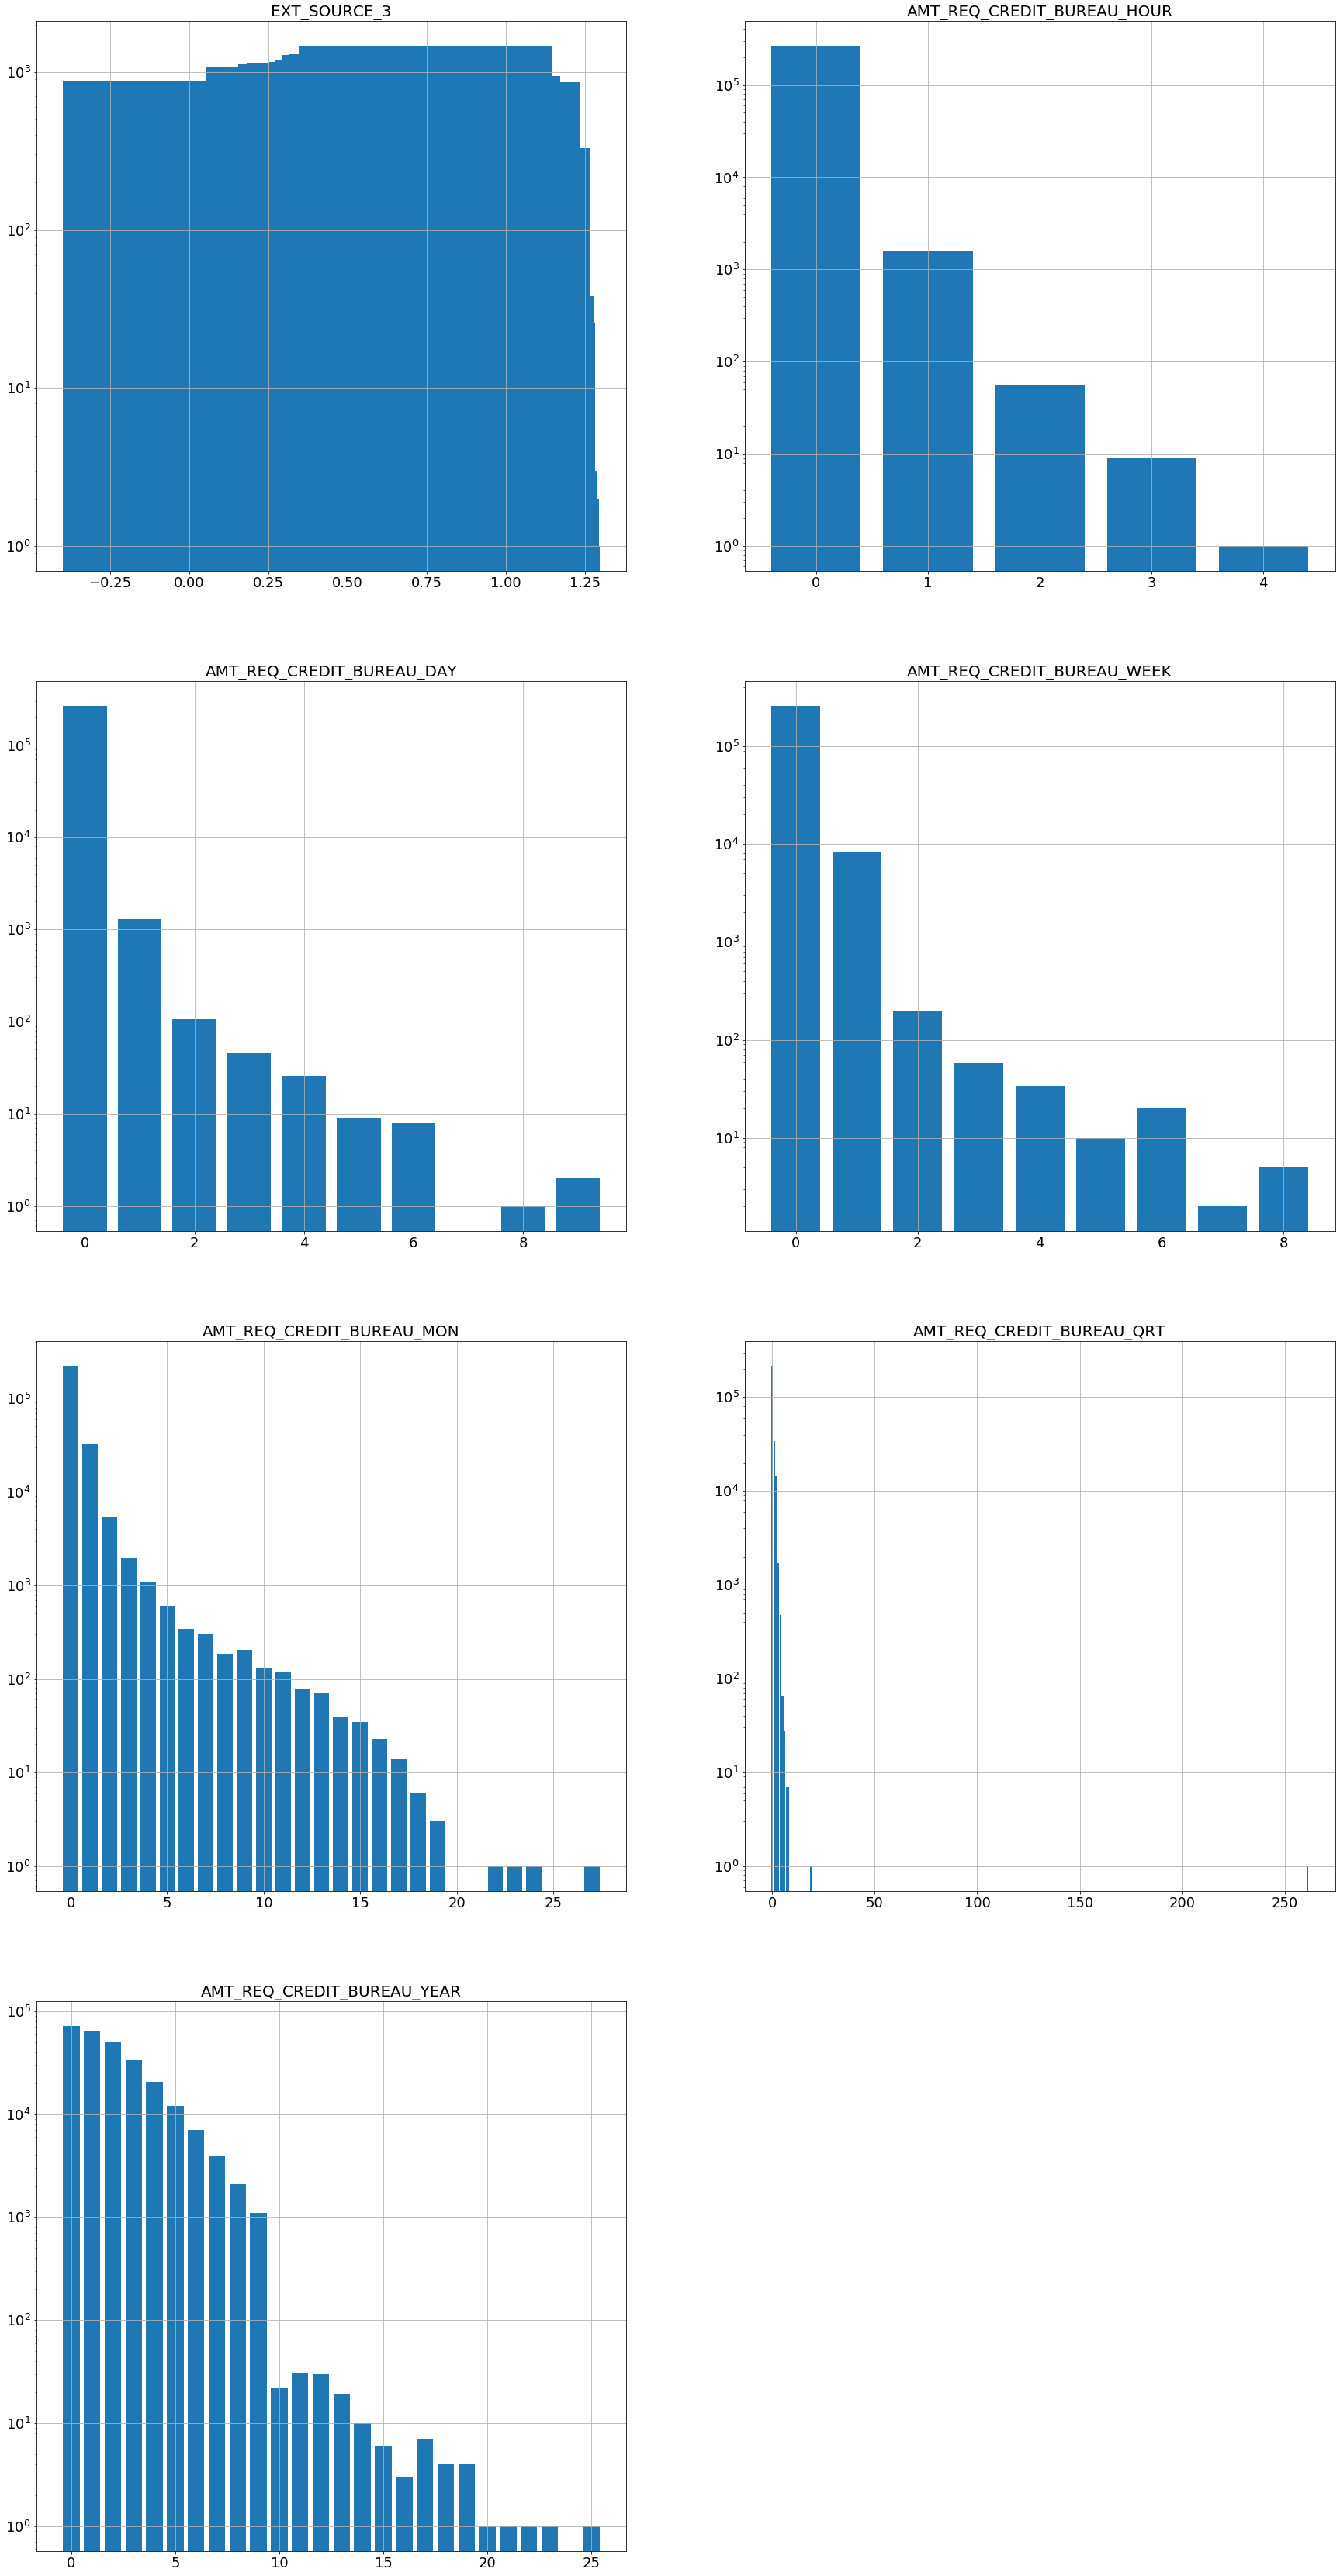

In [13]:

o=2
n=math.ceil(len(my_list2)/o)
fig,axes=plt.subplots(n,o,figsize=(30,60))
i=0
j=0
#Plot subplots
for col in my_list2:
        #Axes for subplot
        ax=axes[i][j]
       
        
        x=list(dict(app_dt[col].value_counts()).keys())
        y=list(dict(app_dt[col].value_counts()).values())
        ax.bar(x,y)
        ax.set_yscale('log')
        ax.tick_params(axis="both",labelsize=18)
        #Set title of subplot
        ax.set_title(col,size=20)
        
        #Change fontsize to legible size for xticks and yticks
       
        ax.tick_params(axis="y",labelsize=18)
        
        if(j<o-1):
            j=j+1
        else:
            j=0
            i=i+1
        ax.grid()

while(j<o):
    fig.delaxes(axes[i][j])
    j=j+1      


For AMT_REQ_CREDIT_BUREAU_QRT, we can impute with median as there is an outlier. Other columns can be imputed with mean.

In [14]:
#Drop the columns used for suggesting imputation as they are not required for further analysis
app_dt=app_dt.drop(my_list2,axis=1)

# Convert days to years/age

In [15]:
#All values are negative for days_birth so absolute is taken
app_dt['AGE']=round(abs(app_dt['DAYS_BIRTH'])/365,0)
#All values are negative for days_registration so absolute is taken
app_dt['REG_AGE']=round(abs(app_dt['DAYS_REGISTRATION'])/365,0) 
#Values are negative and positive for days_employed 
#positve values replacing by -10 in years indicates no employment at the time of application 
#negative indicates number of days of employment
app_dt['EMPLOYED_AGE']=round(-(app_dt['DAYS_EMPLOYED']/365),0)
app_dt['EMPLOYED_AGE'].loc[app_dt['EMPLOYED_AGE']<0]=-10
#All values are negative for days_id_publish so absolute is taken
app_dt['ID_PUBLISH_AGE']=round(abs(app_dt['DAYS_ID_PUBLISH'])/365,0)

                           



In [16]:
print(app_dt['EMPLOYED_AGE'].min())
app_dt.info()

-10.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
SK_ID_CURR                     307511 non-null category
TARGET                         307511 non-null category
NAME_CONTRACT_TYPE             307511 non-null category
CODE_GENDER                    307507 non-null category
FLAG_OWN_CAR                   307511 non-null category
FLAG_OWN_REALTY                307511 non-null category
CNT_CHILDREN                   307511 non-null float64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_INCOME_TYPE               307511 non-null category
NAME_EDUCATION_TYPE            307511 non-null category
NAME_FAMILY_STATUS             307511 non-null category
NAME_HOUSING_TYPE              307511 non-null category
REGION_POPULATION_RELATIVE     307511 non-null f

# Check outlier in columns

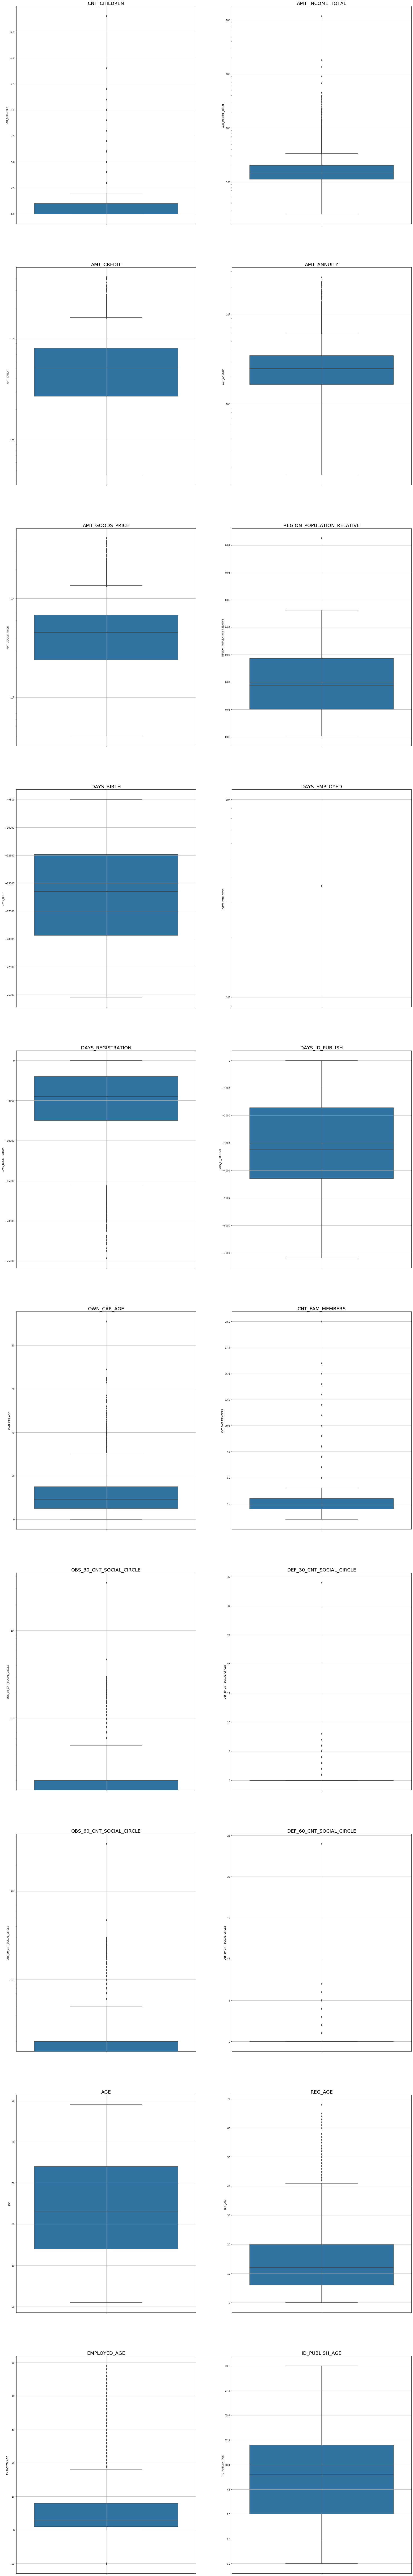

In [17]:
my_list2=[]
for col in app_dt.columns:
    
    if(app_dt[col].dtype==np.float64 ):
        my_list2.append(col)
o=2
n=math.ceil(len(my_list2)/o)
fig,axes=plt.subplots(n,o,figsize=(30,200))
i=0
j=0
for col in my_list2:
    ax=axes[i][j]
    sns.boxplot(y=app_dt[col],ax=ax)
    if(app_dt[col].max()>100):
        ax.set_yscale('log')
    ax.set_title(col,size=20)
    if(j<o-1):
        j=j+1
    else:
        j=0
        i=i+1
    ax.grid()
while(j<o  and j>0):
    fig.delaxes(axes[i][j])
    j=j+1      

We notice outliers for AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,
OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE

If these have missing values we can treat with median, others with means.

# Treating the outliers using median


In [18]:
columns_MED=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
             'DAYS_REGISTRATION','OWN_CAR_AGE','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
             'DEF_30_CNT_SOCIAL_CIRCLE']
for col in columns_MED:
    outlier_limit=float(app_dt[col].quantile([0.99]))
    app_dt[col].loc[app_dt[col]>outlier_limit]=app_dt[col].median()
    print(col,app_dt[col].median(),outlier_limit,app_dt[col].max())


AMT_INCOME_TOTAL 147150.0 472500.0 472500.0
AMT_CREDIT 513531.0 1854000.0 1854000.0
AMT_ANNUITY 24903.0 70006.5 70006.5
AMT_GOODS_PRICE 450000.0 1800000.0 1800000.0
REGION_POPULATION_RELATIVE 0.01885 0.072508 0.072508
DAYS_REGISTRATION -4504.0 -50.0 -50.0
OWN_CAR_AGE 9.0 64.0 64.0
CNT_FAM_MEMBERS 2.0 5.0 5.0
OBS_30_CNT_SOCIAL_CIRCLE 0.0 10.0 10.0
DEF_30_CNT_SOCIAL_CIRCLE 0.0 2.0 2.0


# Binning of Numerical Data
Calculate quantile and Store as _bin column

In [19]:
BINNING=['AMT_INCOME_TOTAL','AGE','AMT_CREDIT','REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','EMPLOYED_AGE',
         'REG_AGE','ID_PUBLISH_AGE']
for col in BINNING:
    #Divide into 10 quantiles
    quant=list(round(app_dt[col].quantile([i/100 for i in range(0,110,10)]),3))
    
        
    values=[]
    for i in range(0,len(app_dt)):
        cur_value=app_dt[col].iloc[i]
        if(cur_value>quant[9] and cur_value<=quant[10]):
            values.append(quant[10])
        elif(cur_value>quant[8] and cur_value<=quant[9]):
            values.append(quant[9])
        elif(cur_value>quant[7] and cur_value<=quant[8]):
            values.append(quant[8])
        elif(cur_value>quant[6] and cur_value<=quant[7]):
            values.append(quant[7])
        elif(cur_value>quant[5] and cur_value<=quant[6]):
            values.append(quant[6])
        elif(cur_value>quant[4] and cur_value<=quant[5]):
            values.append(quant[5])
        elif(cur_value>quant[3] and cur_value<=quant[4]):
            values.append(quant[4])
        elif(cur_value>quant[2] and cur_value<=quant[3]):
            values.append(quant[3])
        elif(cur_value>quant[1] and cur_value<=quant[2]):
            values.append(quant[2])
        

        elif(cur_value<=quant[1] and cur_value>=quant[0]):
            values.append(quant[1])

        else:
            values.append(cur_value)
    #print(quant)
    app_dt[col+'_BIN']=values


# Splitting of dataframe according to TARGET

In [20]:
df0=pd.DataFrame(app_dt.query('TARGET==0'))
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,REG_AGE,EMPLOYED_AGE,ID_PUBLISH_AGE,AMT_INCOME_TOTAL_BIN,AGE_BIN,AMT_CREDIT_BIN,REGION_POPULATION_RELATIVE_BIN,AMT_GOODS_PRICE_BIN,EMPLOYED_AGE_BIN,REG_AGE_BIN,ID_PUBLISH_AGE_BIN
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,School,1.0,0.0,1.0,0.0,46.0,3.0,3.0,1.0,270000.0,47.0,1854000.0,0.007,1800000.0,3.0,4.0,2.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,Government,0.0,0.0,0.0,0.0,52.0,12.0,1.0,7.0,81000.0,52.0,180000.0,0.011,180000.0,1.0,12.0,7.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,52.0,27.0,8.0,7.0,135000.0,52.0,432000.0,0.009,373500.0,9.0,27.0,7.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,1,Religion,0.0,0.0,0.0,0.0,55.0,12.0,8.0,9.0,135000.0,56.0,513531.0,0.031,675000.0,9.0,12.0,9.0
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941.0,-1588.0,-4970.0,-477.0,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,0,Other,0.0,0.0,0.0,0.0,46.0,14.0,4.0,1.0,99000.0,47.0,513531.0,0.036,508500.0,5.0,15.0,2.0


In [21]:
df1=pd.DataFrame(app_dt.query('TARGET==1'))

In [22]:
df1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,REG_AGE,EMPLOYED_AGE,ID_PUBLISH_AGE,AMT_INCOME_TOTAL_BIN,AGE_BIN,AMT_CREDIT_BIN,REGION_POPULATION_RELATIVE_BIN,AMT_GOODS_PRICE_BIN,EMPLOYED_AGE_BIN,REG_AGE_BIN,ID_PUBLISH_AGE_BIN
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,26.0,10.0,2.0,6.0,225000.0,28.0,432000.0,0.019,373500.0,2.0,10.0,6.0
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724.0,-2628.0,-6573.0,-1827.0,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,0,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,51.0,18.0,7.0,5.0,112500.0,52.0,1125000.0,0.019,810000.0,9.0,19.0,6.0
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482.0,-1262.0,-1182.0,-1029.0,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,48.0,3.0,3.0,3.0,225000.0,52.0,1854000.0,0.031,1057500.0,3.0,4.0,4.0
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384.0,-3597.0,-4504.0,-4409.0,NaN,1,1,1,1,1,0,Sales staff,2.0,3,3,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,37.0,0.0,10.0,12.0,135000.0,39.0,306306.0,0.009,270000.0,13.0,2.0,12.0
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794.0,365243.0,-5391.0,-4199.0,NaN,1,0,0,1,0,0,NaN,2.0,2,2,0,0,0,0,NaN,1.0,1.0,1.0,1.0,68.0,15.0,-10.0,12.0,81000.0,69.0,254700.0,0.031,270000.0,-10.0,15.0,12.0
94,100112,1,Cash loans,M,Y,Y,0.0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199.0,-2015.0,-4802.0,-1038.0,2.0,1,1,0,1,0,0,NaN,1.0,2,2,0,0,0,1,Industry: type 4,0.0,0.0,0.0,0.0,28.0,13.0,6.0,3.0,472500.0,28.0,1125000.0,0.031,1057500.0,6.0,15.0,4.0
110,100130,1,Cash loans,F,N,Y,1.0,157500.0,723996.0,30802.5,585000.0,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,-10526.0,-267.0,-387.0,-3190.0,NaN,1,1,0,1,1,0,Sales staff,2.0,2,2,0,1,0,1,Trade: type 2,0.0,0.0,0.0,0.0,29.0,1.0,1.0,9.0,157500.0,32.0,729000.0,0.009,675000.0,1.0,2.0,9.0
138,100160,1,Cash loans,M,N,Y,0.0,292500.0,675000.0,36747.0,675000.0,Working,Higher education,Married,House / apartment,0.035792,-16667.0,-200.0,-5239.0,-114.0,NaN,1,1,1,1,1,0,Managers,2.0,2,2,1,0,1,0,Business Entity Type 3,0.0,0.0,0.0,0.0,46.0,14.0,1.0,0.0,472500.0,47.0,729000.0,0.036,675000.0,1.0,15.0,2.0
154,100181,1,Cash loans,F,N,Y,0.0,157500.0,245619.0,12667.5,166500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.022625,-17538.0,-7676.0,-774.0,-1082.0,NaN,1,1,0,1,1,0,Private service staff,1.0,2,2,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,48.0,2.0,21.0,3.0,157500.0,52.0,254700.0,0.025,180000.0,49.0,2.0,4.0
163,100192,1,Cash loans,F,N,N,0.0,111915.0,225000.0,21037.5,225000.0,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.018801,-7989.0,-150.0,-2570.0,

# Univariate Analysis

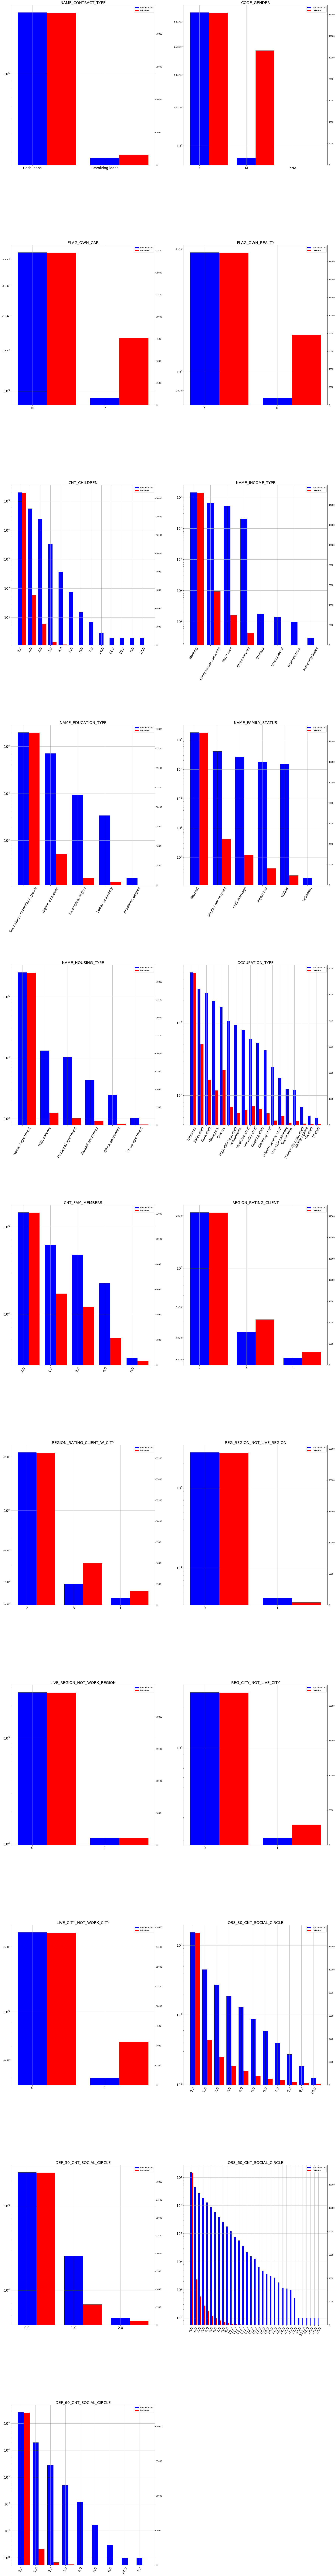

In [23]:
#Univariate Columns
UNIVARIATE=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
            #'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE',
            'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',#'EMPLOYED_AGE','AGE',
            #'REG_AGE','ID_PUBLISH_AGE',
            'OCCUPATION_TYPE','CNT_FAM_MEMBERS',
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

o=2
n=math.ceil(len(UNIVARIATE)/2)

fig,axes=plt.subplots(n,o,figsize=(30,200))
i=0
j=0
for col in UNIVARIATE:
    ax=axes[i][j]
    x1=list(dict(df0[col].value_counts()).keys())
    y1=list(dict(df0[col].value_counts()).values())
    pos=list(range(0,len(x1)))
    ax.set_title(col,fontsize=20)
    line1=ax.bar(pos,y1,width=0.4,color='blue')
    if(max(y1)>1000):
        ax.set_yscale('log')
    ax.tick_params(axis="both",labelsize=18)
    
    if(len(x1)>4):
        ax.set_xticklabels(x1,rotation=60)
    
   
    ax.grid()
    plt.subplots_adjust(top=0.95,bottom=0.01,hspace=0.5,wspace=0.2)
    
    ax2=ax.twinx()
    v=dict(df1[col].value_counts())
    y2=[]
    for k  in x1:
        if(k in v.keys()):
            y2.append(v[k])
        else:
            y2.append(0)
        
    
    line2=ax2.bar([p+0.4 for p in pos],y2,width=0.4,color='red')
    plt.xticks(pos,x1)
    ax2.legend([line1,line2],['Non-defaulter','Defaulter'])
    if(j<o-1):
        j=j+1
    else:
        j=0
        i=i+1
   
    

while(j<o and j>0):
    fig.delaxes(axes[i][j])
    j=j+1
    
#plt.savefig('D:/test.png',bbox_inches='tight')

Text(0.5, 0.98, 'ORGANIZATION_TYPE - TARGET=1')

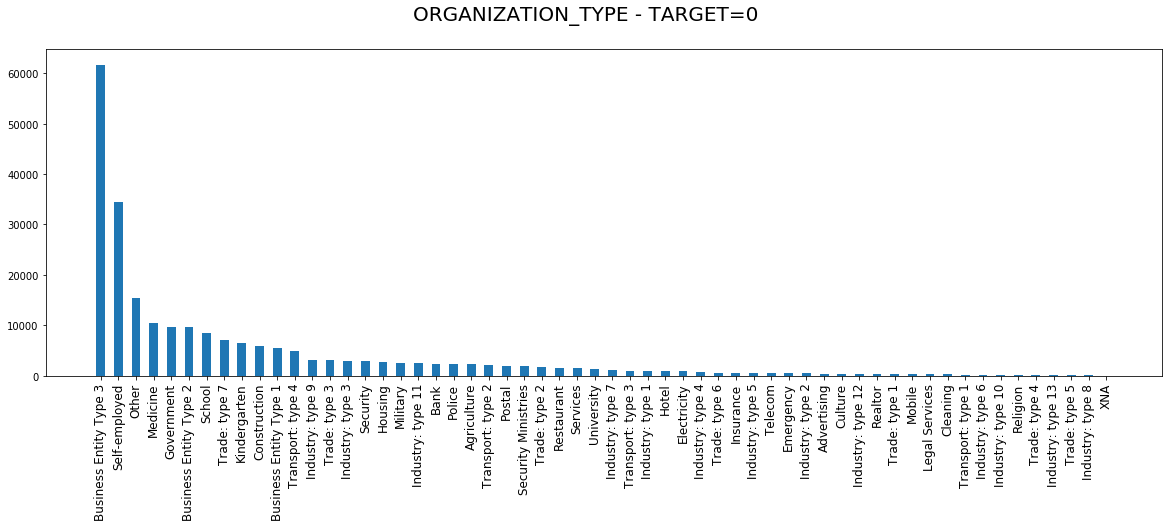

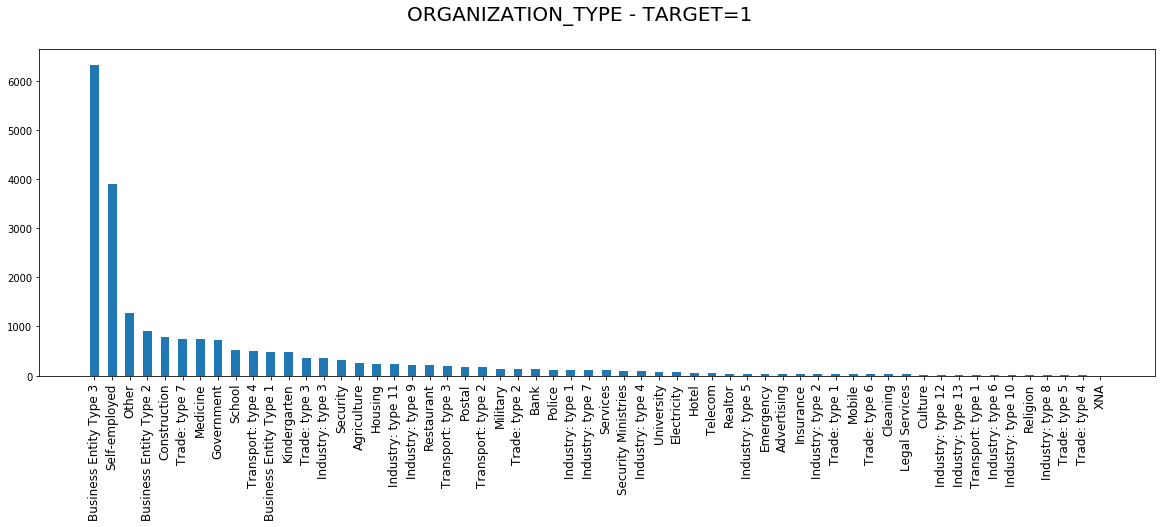

In [24]:
col='ORGANIZATION_TYPE'
x1=list(dict(df0[col].value_counts()).keys())
y1=list(dict(df0[col].value_counts()).values())
   

plt.figure(figsize=(20,6))
plt.bar(x1,y1,width=0.5,align='center')
plt.xticks(x1,rotation=90,fontsize=12)
plt.suptitle("ORGANIZATION_TYPE - TARGET=0",fontsize=20)

x1=list(dict(df1[col].value_counts()).keys())
y1=list(dict(df1[col].value_counts()).values())
   

plt.figure(figsize=(20,6))
plt.bar(x1,y1,width=0.5,align='center')
plt.xticks(x1,rotation=90,fontsize=12)
plt.suptitle("ORGANIZATION_TYPE - TARGET=1",fontsize=20)


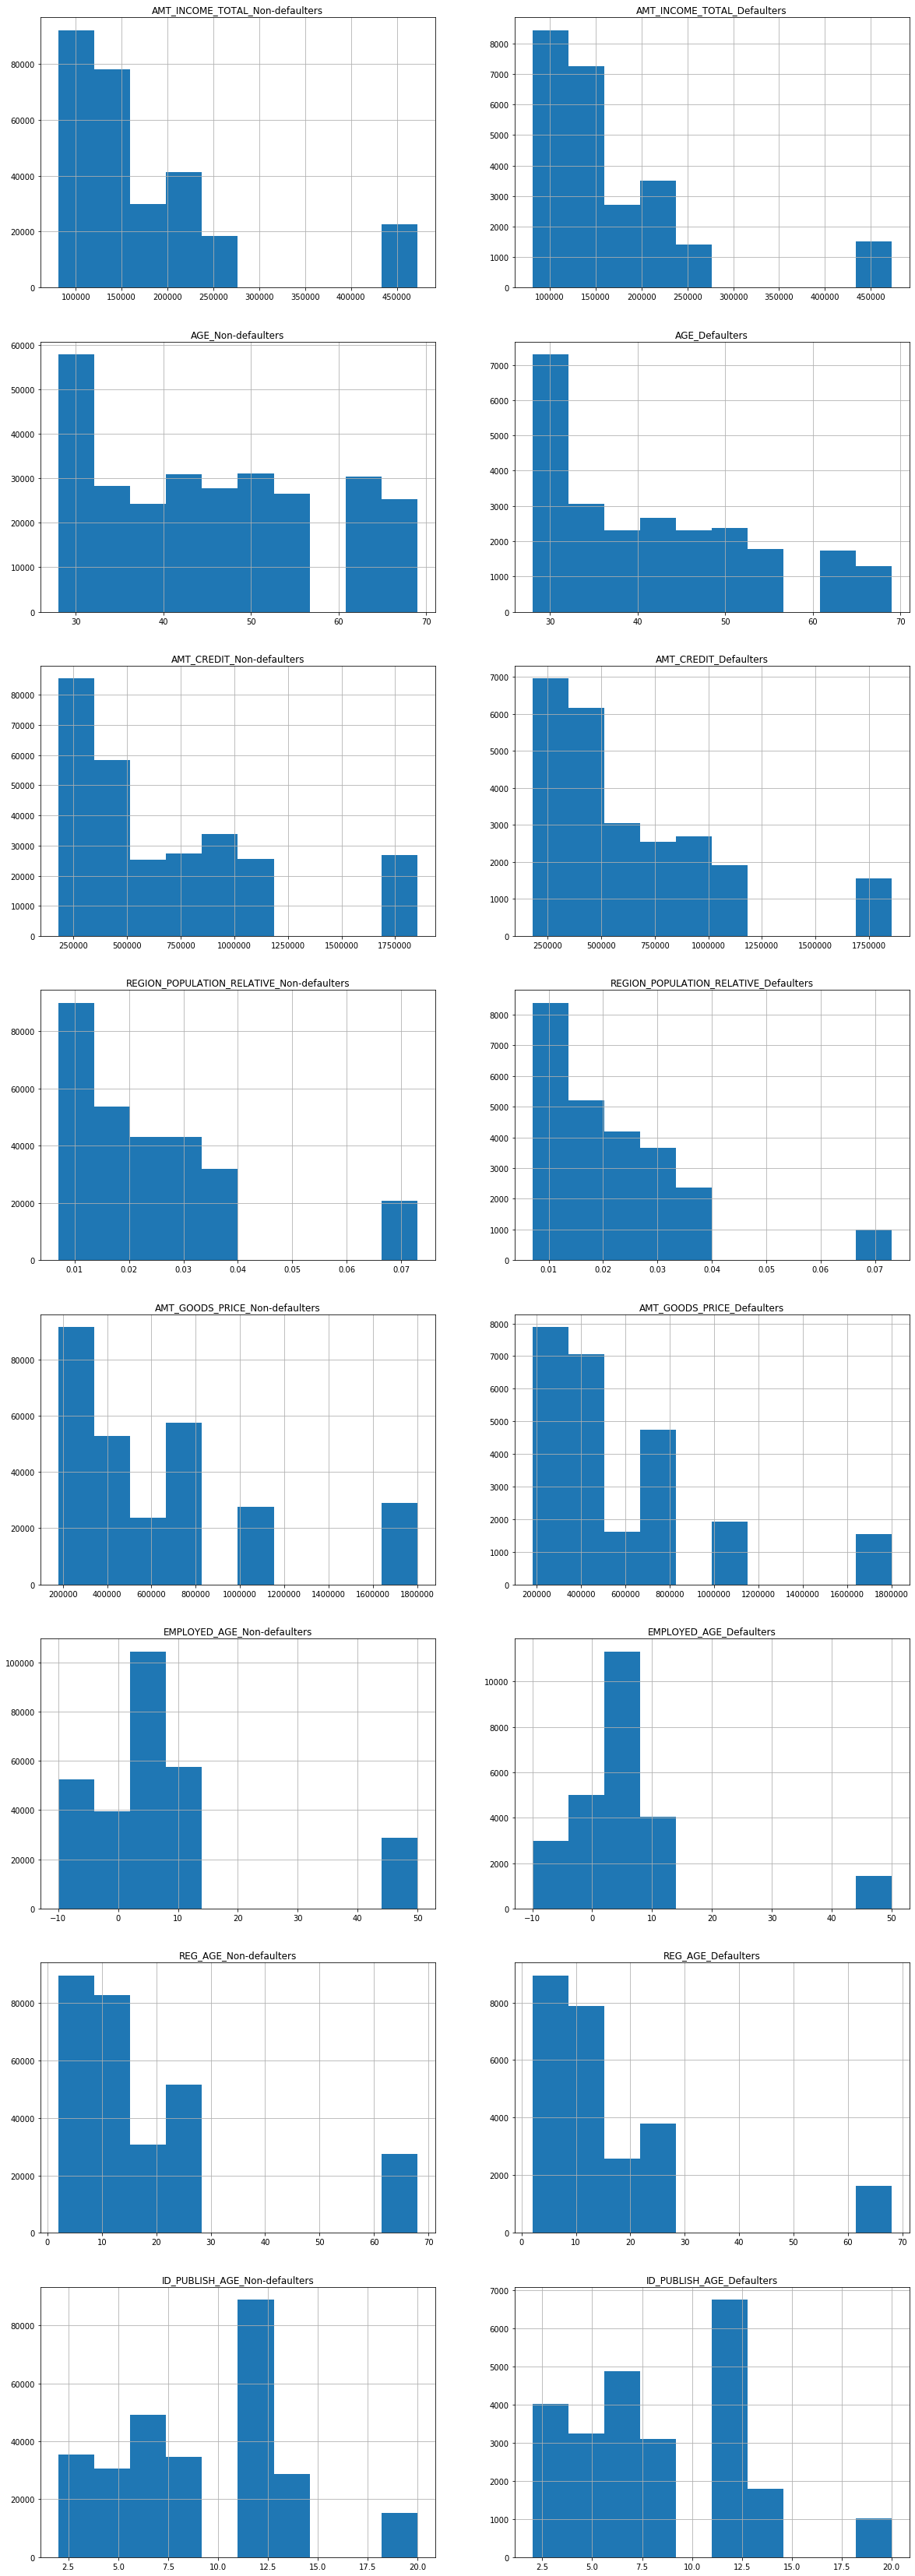

In [25]:
o=2
n=math.ceil(len(BINNING))

fig,axes=plt.subplots(n,o,figsize=(20,60))
i=0
j=0
for col in BINNING:
    ax=axes[i][0]
    ax.set_title(col+'_Non-defaulters')
    
    if(col=='EMPLOYED_AGE'):
        ax.hist(df0[col+'_BIN'],range=(-10,50))
    else:
        n,bins,patches=ax.hist(df0[col+'_BIN'])
    ax.grid()
    ax=axes[i][1]
    ax.set_title(col+'_Defaulters')
    if(col=='EMPLOYED_AGE'):
        ax.hist(df1[col+'_BIN'],range=(-10,50))
    else:
        n,bins,patches=ax.hist(df1[col+'_BIN'])
    ax.grid()
    i=i+1
   
    

while(j<o and j>0):
    fig.delaxes(axes[i][j])
    j=j+1
    
#plt.savefig('D:/test.png',bbox_inches='tight')
   

In [26]:
app_dt.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,REG_AGE,EMPLOYED_AGE,ID_PUBLISH_AGE,AMT_INCOME_TOTAL_BIN,AGE_BIN,AMT_CREDIT_BIN,REGION_POPULATION_RELATIVE_BIN,AMT_GOODS_PRICE_BIN,EMPLOYED_AGE_BIN,REG_AGE_BIN,ID_PUBLISH_AGE_BIN
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,26.0,10.0,2.0,6.0,225000.0,28.0,432000.0,0.019,373500.0,2.0,10.0,6.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,School,1.0,0.0,1.0,0.0,46.0,3.0,3.0,1.0,270000.0,47.0,1854000.0,0.007,1800000.0,3.0,4.0,2.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,Government,0.0,0.0,0.0,0.0,52.0,12.0,1.0,7.0,81000.0,52.0,180000.0,0.011,180000.0,1.0,12.0,7.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,52.0,27.0,8.0,7.0,135000.0,52.0,432000.0,0.009,373500.0,9.0,27.0,7.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,1,Religion,0.0,0.0,0.0,0.0,55.0,12.0,8.0,9.0,135000.0,56.0,513531.0,0.031,675000.0,9.0,12.0,9.0
5,100008,0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941.0,-1588.0,-4970.0,-477.0,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,0,Other,0.0,0.0,0.0,0.0,46.0,14.0,4.0,1.0,99000.0,47.0,513531.0,0.036,508500.0,5.0,15.0,2.0
6,100009,0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778.0,-3130.0,-1213.0,-619.0,17.0,1,1,0,1,1,0,Accountants,3.0,2,2,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,38.0,3.0,9.0,2.0,180000.0,39.0,1854000.0,0.036,1800000.0,9.0,4.0,2.0
7,100010,0,Cash loans,M,Y,Y,0.0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,-18850.0,-449.0,-4597.0,-2379.0,8.0,1,1,1,1,0,0,Managers,2.0,3,3,0,0,0,1,Other,2.0,0.0,2.0,0.0,52.0,13.0,1.0,7.0,472500.0,52.0,1854000.0,0.007,1800000.0,1.0,15.0,7.0
8,100011,0,Cash loans,F,N,Y,0.0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099.0,365243.0,-7427.0,-3514.0,NaN,1,0,0,1,0,0,NaN,2.0,2,2,0,0,0,0,NaN,1.0,0.0,1.0,0.0,55.0,20.0,-10.0,10.0,112500.0,56.0,1125000.0,0.019,1057500.0,-10.0,23.0,11.0
9,100012,0,Revolving loans,M,N,Y,0.0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469.0,-2019.0,-14437.0,-3992.0,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,0,0,0,0,Electricity,2.0,0.0,2.0,

# Bivariate Analysis

Text(0.5, 0.98, 'CORRELATION OF NUMERICAL DATA')

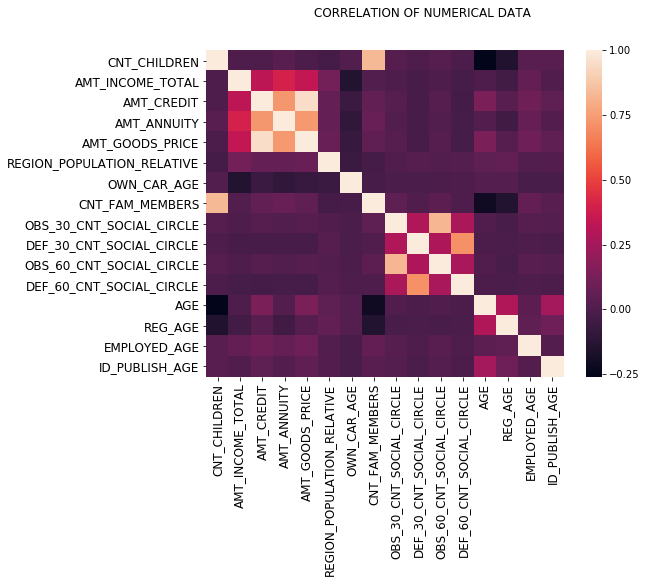

In [27]:
#remove unwanted columns
app_dt1=df1.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL_BIN',
                      'AGE_BIN','AMT_CREDIT_BIN','REGION_POPULATION_RELATIVE_BIN','AMT_GOODS_PRICE_BIN',
                      'EMPLOYED_AGE_BIN','REG_AGE_BIN','ID_PUBLISH_AGE_BIN'],axis=1)
#Removing negative values for better correlation
app_dt1['EMPLOYED_AGE'].loc[app_dt1['EMPLOYED_AGE']==-10]=0
plt.figure(figsize=(8,6))
plt.xticks(rotation=40,fontsize=12)
plt.yticks(rotation=40,fontsize=12)
sns.heatmap(app_dt1.corr())
plt.savefig('D:/test.png',bbox_inches='tight')
plt.suptitle('CORRELATION OF NUMERICAL DATA')


# Read previous app data

In [29]:
prevapp_dt = pd.read_csv(r'D:/share/previous_application.csv')

In [30]:
# Replace XAP and XNA with np.nan
prevapp_dt.replace(['XNA','XAP'],np.nan,inplace=True)
for i in prevapp_dt.columns:
    if(len(prevapp_dt[i].unique())<15):
        print('{}:{}'.format(i,prevapp_dt[i].unique()))
    elif(prevapp_dt[i].dtype==np.float64()):
        print('{}:{}{}'.format(i,prevapp_dt[i].min(),prevapp_dt[i].max()))

NAME_CONTRACT_TYPE:['Consumer loans' 'Cash loans' 'Revolving loans' nan]
AMT_ANNUITY:0.0418058.145
AMT_APPLICATION:0.06905160.0
AMT_CREDIT:0.06905160.0
AMT_DOWN_PAYMENT:-0.93060045.0
AMT_GOODS_PRICE:0.06905160.0
WEEKDAY_APPR_PROCESS_START:['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT:['Y' 'N']
NFLAG_LAST_APPL_IN_DAY:[1 0]
RATE_DOWN_PAYMENT:-1.4978763414307847e-051.0
RATE_INTEREST_PRIMARY:0.034781253541879181.0
RATE_INTEREST_PRIVILEGED:0.37315010570824521.0
NAME_CONTRACT_STATUS:['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE:['Cash through the bank' nan 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON:[nan 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'VERIF' 'SYSTEM']
NAME_TYPE_SUITE:[nan 'Unaccompanied' 'Spouse, partner' 'Family' 'Children' 'Other_B'
 'Other_A' 'Group of people']
NAME_CLIENT_TYPE:['Repeater' 'New' 'Refreshed' nan]
NAME_PORTFOLIO:['POS' 'Cash' nan 'Cards' 'Cars'

# Column Drop if below of the two conditions are true
1.If missing value is more than 47% 



In [31]:
my_list = []
for i in prevapp_dt.columns:
    if round(100*(prevapp_dt[i].isnull().sum()/len(prevapp_dt)), 2) >= 47:
        my_list.append(i)

#Verify and drop my_list if all these columns can be dropped
print(my_list) 
prevapp_dt = prevapp_dt.drop(my_list, axis = 1)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY']


In [32]:
prevapp_dt.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Retain only required columns based upon Column Description.
1.Columns which make sense.



In [33]:
prevwanted=['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
        'NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
prevapp_dt=prevapp_dt[prevwanted]
prevapp_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
SK_ID_CURR              1670214 non-null int64
NAME_CONTRACT_TYPE      1669868 non-null object
AMT_ANNUITY             1297979 non-null float64
NAME_CONTRACT_STATUS    1670214 non-null object
NAME_PAYMENT_TYPE       1042830 non-null object
NAME_CLIENT_TYPE        1668273 non-null object
CHANNEL_TYPE            1670214 non-null object
NAME_YIELD_GROUP        1152999 non-null object
PRODUCT_COMBINATION     1669868 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 114.7+ MB


In [34]:
prevapp_dt.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,271877,Consumer loans,1730.430,Approved,Cash through the bank,Repeater,Country-wide,middle,POS mobile with interest
1,108129,Cash loans,25188.615,Approved,NaN,Repeater,Contact center,low_action,Cash X-Sell: low
2,122040,Cash loans,15060.735,Approved,Cash through the bank,Repeater,Credit and cash offices,high,Cash X-Sell: high
3,176158,Cash loans,47041.335,Approved,Cash through the bank,Repeater,Credit and cash offices,middle,Cash X-Sell: middle
4,202054,Cash loans,31924.395,Refused,Cash through the bank,Repeater,Credit and cash offices,high,Cash Street: high


# Change dataype of columns

1) Set datatype to category for categorical columns

2) Convert int64 to float64 for ease of analysis


In [35]:
category_col=['SK_ID_CURR','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
        'NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
for i in category_col:
    prevapp_dt[i]=prevapp_dt[i].astype('category')
    

#convert all int columns to float
for i in prevapp_dt.columns:
   
    if(prevapp_dt[i].dtype==np.int64):
        prevapp_dt[i]=prevapp_dt[i].astype('float64')
prevapp_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
SK_ID_CURR              1670214 non-null category
NAME_CONTRACT_TYPE      1669868 non-null category
AMT_ANNUITY             1297979 non-null float64
NAME_CONTRACT_STATUS    1670214 non-null category
NAME_PAYMENT_TYPE       1042830 non-null category
NAME_CLIENT_TYPE        1668273 non-null category
CHANNEL_TYPE            1670214 non-null category
NAME_YIELD_GROUP        1152999 non-null category
PRODUCT_COMBINATION     1669868 non-null category
dtypes: category(8), float64(1)
memory usage: 42.9 MB


# Merge Application Data and Previous Application Data

In [36]:
Mergeddata = pd.DataFrame(app_dt[['SK_ID_CURR','TARGET']].merge(prevapp_dt,on=["SK_ID_CURR"], how = "left"))

In [37]:
for i in prevapp_dt.columns:
    print(i,round(100*(Mergeddata[i].isnull().sum()/len(Mergeddata)), 2))
    


SK_ID_CURR 0.0
NAME_CONTRACT_TYPE 1.17
AMT_ANNUITY 22.63
NAME_CONTRACT_STATUS 1.15
NAME_PAYMENT_TYPE 37.72
NAME_CLIENT_TYPE 1.26
CHANNEL_TYPE 1.15
NAME_YIELD_GROUP 31.16
PRODUCT_COMBINATION 1.17


In [38]:
# Dropping AMT_ANNUITY as 22% is null
Mergeddata = Mergeddata.drop('AMT_ANNUITY', axis = 1)

In [39]:
df0=pd.DataFrame(Mergeddata.query('TARGET==0'))
df1=pd.DataFrame(Mergeddata.query('TARGET==1'))
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,100003,0,Cash loans,Approved,NaN,Repeater,Credit and cash offices,low_normal,Cash X-Sell: low
2,100003,0,Consumer loans,Approved,Cash through the bank,Refreshed,Stone,middle,POS industry with interest
3,100003,0,Consumer loans,Approved,Cash through the bank,Refreshed,Country-wide,middle,POS household with interest
4,100004,0,Consumer loans,Approved,Cash through the bank,New,Regional / Local,middle,POS mobile without interest
5,100006,0,Cash loans,Approved,Cash through the bank,Repeater,Credit and cash offices,low_normal,Cash X-Sell: low


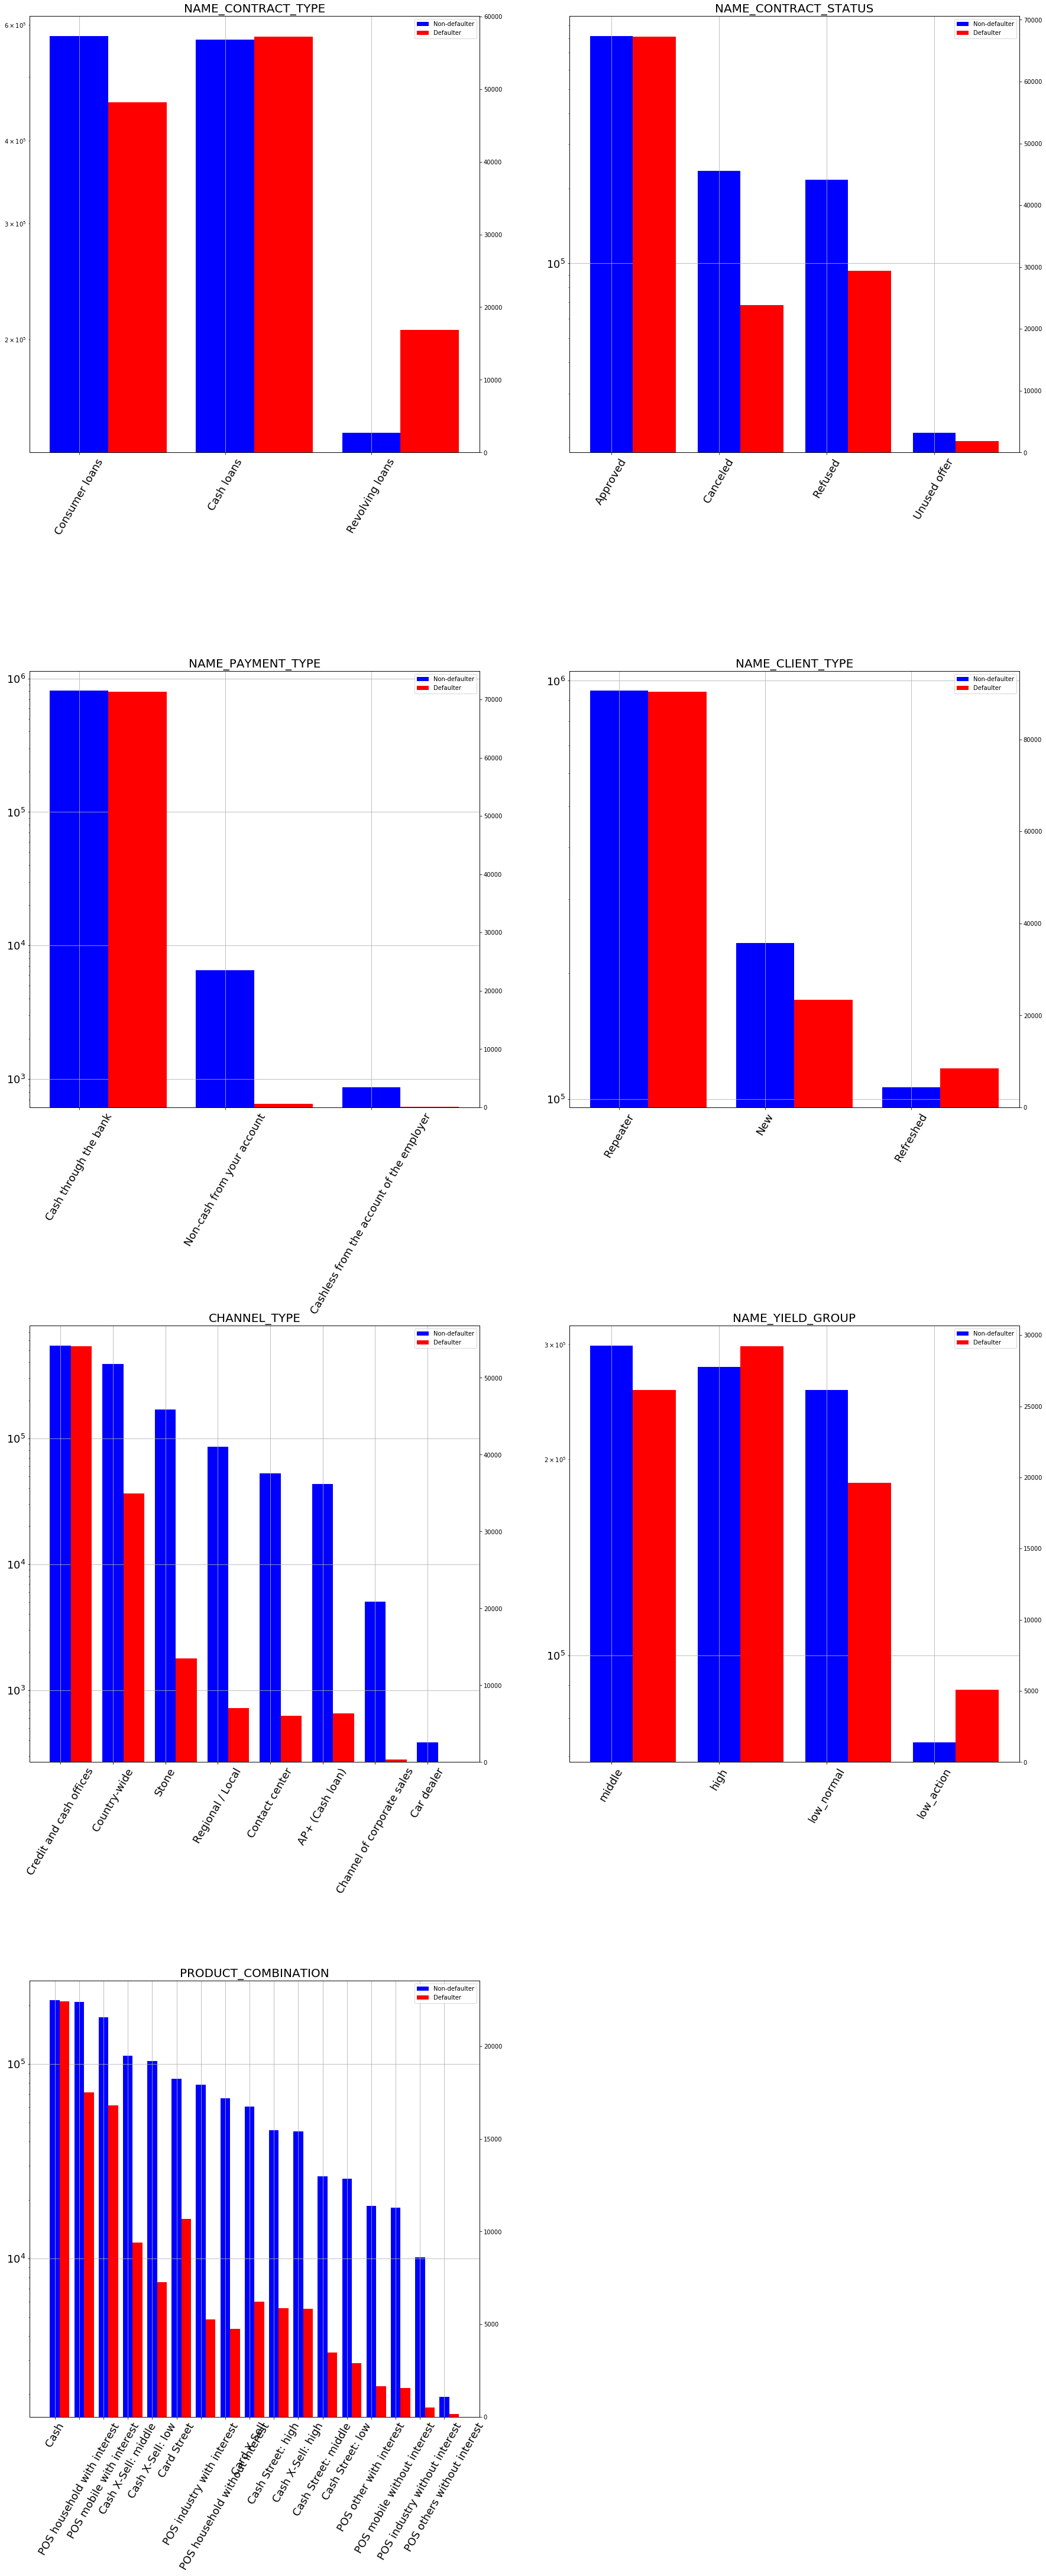

In [42]:
#Univariate Columns
UNIVARIATE=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CHANNEL_TYPE',
           'NAME_YIELD_GROUP','PRODUCT_COMBINATION']
o=2
n=math.ceil(len(UNIVARIATE)/2)

fig,axes=plt.subplots(n,o,figsize=(30,60))
i=0
j=0
for col in UNIVARIATE:
    ax=axes[i][j]
    x1=list(dict(df0[col].value_counts()).keys())
    y1=list(dict(df0[col].value_counts()).values())
    pos=list(range(0,len(x1)))
    ax.set_title(col,fontsize=20)
    line1=ax.bar(pos,y1,width=0.4,color='blue')
    if(max(y1)>1000):
        ax.set_yscale('log')
    ax.tick_params(axis="both",labelsize=18)
    
    ax.set_xticklabels(x1,rotation=60)
    
   
    ax.grid()
    plt.subplots_adjust(top=0.95,bottom=0.01,hspace=0.5,wspace=0.2)
    
    ax2=ax.twinx()
    v=dict(df1[col].value_counts())
    y2=[]
    for k  in x1:
        if(k in v.keys()):
            y2.append(v[k])
        else:
            y2.append(0)
        
     
    line2=ax2.bar([p+0.4 for p in pos],y2,width=0.4,color='red')
    plt.xticks(pos,x1)
    ax2.legend([line1,line2],['Non-defaulter','Defaulter'])
    if(j<o-1):
        j=j+1
    else:
        j=0
        i=i+1
   
    

while(j<o and j>0):
    fig.delaxes(axes[i][j])
    j=j+1
    
plt.savefig('D:/test_merged1.png',bbox_inches='tight')